In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [4]:
# Check Missing Value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

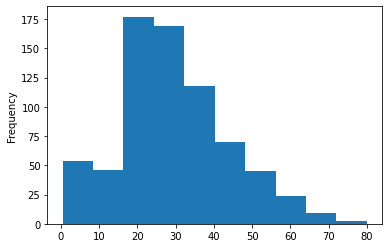

In [5]:
# Handling Missing Value
df['Age'].plot(kind='hist')

In [6]:
rataan_umur = df['Age'].mean()

In [7]:
df['Age'] = df['Age'].fillna(rataan_umur)

In [8]:
df = df[~df['Embarked'].isna()]

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
# Check Duplicate Value
df.duplicated(subset=['PassengerId']).sum()

0

In [11]:
# Drop Passenger Id
df = df.drop('PassengerId',axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Check outliers
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Handling Outliers
df.sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0000,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S
633,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0000,NaN,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
737,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C


In [14]:
df.groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [15]:
bool_filter = df['Fare']>0
df[bool_filter].groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,86.207715
2,21.358661
3,13.787875


In [16]:
df.loc[(df['Pclass']==1) & (df['Fare'] == 0),'Fare'] = 86.207715
df.loc[(df['Pclass']==2) & (df['Fare'] == 0),'Fare'] = 21.358661
df.loc[(df['Pclass']==3) & (df['Fare'] == 0),'Fare'] = 13.787875

In [17]:
df.sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
843,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
818,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Data Preprocessing

In [18]:
# Handling Category
list_kolom_kategorikal = df.select_dtypes('object').columns
for col in list_kolom_kategorikal : 
  print (df[col].value_counts())
  print ("---------------------------------")

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64
---------------------------------
male      577
female    312
Name: Sex, dtype: int64
---------------------------------
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64
---------------------------------
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           

In [19]:
# Data Encoding
# Label Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex']) 

In [20]:
# one hot encoding
dummies_embarked = pd.get_dummies(df['Embarked'],prefix='embarked')
dummies_embarked.head()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
df = pd.concat([df, dummies_embarked], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [22]:
# drop embarked,and ticket
df = df.drop(['Embarked','Ticket'],axis=1)

In [23]:
# feature engineering, creat title column
df['Title'] = df['Name'].str.split(', ' ).str[1].str.split('.').str[0]

In [24]:
df['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [25]:
df['Title_Category'] = df['Title'].isin(['Mr','Miss','Mrs']).map({True : 'normal_title', False : 'unique_title'})

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,embarked_C,embarked_Q,embarked_S,Title,Title_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0,0,1,Mr,normal_title
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1,0,0,Mrs,normal_title
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,0,1,Miss,normal_title
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0,0,1,Mrs,normal_title
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,0,1,Mr,normal_title


In [27]:
# getting insight from df['Cabin']
df['Cabin_Category'] = df['Cabin'].str[0].fillna('Unknown')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,embarked_C,embarked_Q,embarked_S,Title,Title_Category,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0,0,1,Mr,normal_title,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1,0,0,Mrs,normal_title,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,0,1,Miss,normal_title,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0,0,1,Mrs,normal_title,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,0,1,Mr,normal_title,Unknown


In [28]:
# creat feature engineering, Cabin Category
df.groupby('Cabin_Category').agg({'Survived':['mean','count','sum']})

Survived           
                    mean count  sum
Cabin_Category                     
A               0.466667    15    7
B               0.733333    45   33
C               0.593220    59   35
D               0.757576    33   25
E               0.750000    32   24
F               0.615385    13    8
G               0.500000     4    2
T               0.000000     1    0
Unknown         0.299854   687  206

In [29]:
# label encoding for title category
le = preprocessing.LabelEncoder()
le.fit(df['Title_Category'])
df['Title_Category'] = le.transform(df['Title_Category']) 

# Exploratory Data Analysis

In [30]:
df_1 = df

In [31]:
df_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,embarked_C,embarked_Q,embarked_S,Title,Title_Category,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0,0,1,Mr,0,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1,0,0,Mrs,0,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,0,1,Miss,0,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0,0,1,Mrs,0,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,0,1,Mr,0,Unknown


In [32]:
df_2 = df_1.drop(['Name','Title','Cabin_Category','Cabin'],axis=1)

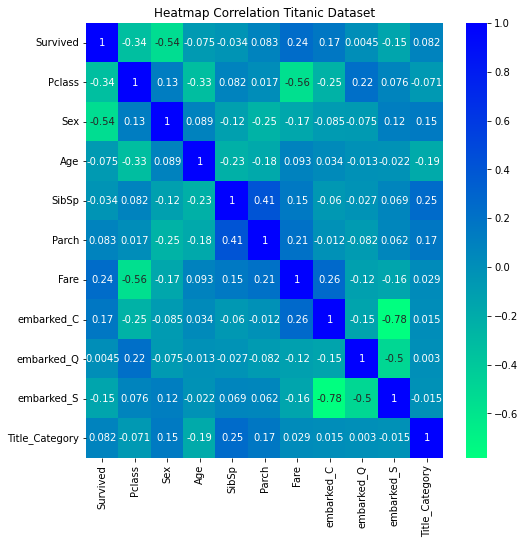

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df_2.corr(),annot=True,cmap='winter_r')
plt.title('Heatmap Correlation Titanic Dataset')
plt.show()

No handles with labels found to put in legend.


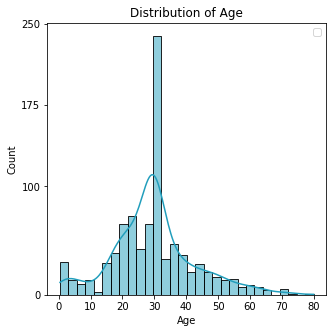

In [34]:
# get insight from age distribution
plt.figure(figsize=(5,5))
sns.histplot(df_1['Age'],color='#219ebc',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.yticks([0,100,175,250])
plt.title('Distribution of Age')
plt.legend()
plt.show()

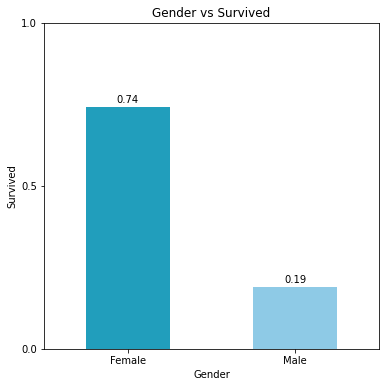

In [35]:
# comparing sex and survived

ax = df_1.groupby('Sex').agg({'Survived':'mean'}).unstack().plot(kind='bar',color=['#219ebc','#8ecae6'],figsize=(6,6))
for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',color='k')
plt.title('Gender vs Survived')
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.xticks([0,1],[str('Female'),str('Male')],rotation = 0)
plt.yticks([0,0.5,1
            ])

plt.show()

In [36]:
df_1.groupby('Sex').agg({'Survived':['mean','count','sum']})

Survived           
         mean count  sum
Sex                     
0    0.740385   312  231
1    0.188908   577  109

In [37]:
df_1.groupby('Title_Category').agg({'Survived':['mean','count','sum']})

Survived           
                    mean count  sum
Title_Category                     
0               0.371046   822  305
1               0.522388    67   35

In [38]:
df_1.groupby('Title_Category').agg({'Sex':['mean','count','sum']})

Sex           
                    mean count  sum
Title_Category                     
0               0.628954   822  517
1               0.895522    67   60

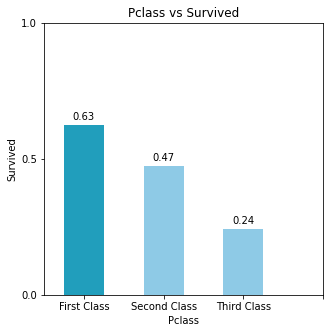

In [39]:
# comparing class and survived
ax = df_1.groupby('Pclass').agg({'Survived':'mean'}).unstack().plot(kind='bar',color=['#219ebc','#8ecae6','#8ecae6'],figsize=(5,5))

for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',color='k')
      
plt.title('Pclass vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.xticks([0,1,2,3],[str('First Class'),str('Second Class'),str('Third Class')],rotation = 0)
plt.yticks([0,0.5,1])

plt.show()

In [40]:
df_1.groupby('Pclass').agg({'Survived':['mean','count','sum']})

Survived           
            mean count  sum
Pclass                     
1       0.626168   214  134
2       0.472826   184   87
3       0.242363   491  119

In [41]:
df_1.groupby('Title_Category').agg({'Survived':['mean','sum','count']})

Survived           
                    mean  sum count
Title_Category                     
0               0.371046  305   822
1               0.522388   35    67

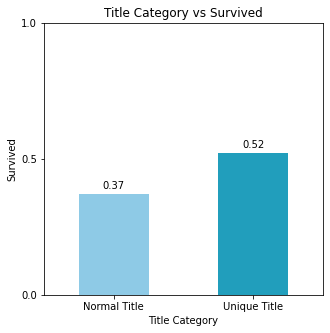

In [42]:
# comparing title and survived
ax = df_1.groupby('Title_Category').agg({'Survived':'mean'}).unstack().plot(kind='bar',color=['#8ecae6','#219ebc'],figsize=(5,5))

for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',color='k')

plt.title('Title Category vs Survived')
plt.xlabel('Title Category')
plt.ylabel('Survived')
plt.xticks([0,1],[str('Normal Title'),str('Unique Title')],rotation = 0)
plt.yticks([0,0.5,1])


plt.show()

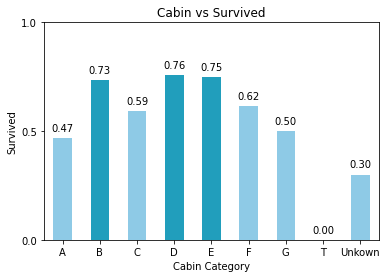

In [43]:
# comparing cabin and survived
ax = df_1.groupby('Cabin_Category').agg({'Survived':'mean'}).unstack().plot(kind='bar',color=['#8ecae6','#219ebc','#8ecae6','#219ebc','#219ebc','#8ecae6','#8ecae6','#8ecae6'])

for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points',color='k')
      
plt.title('Cabin vs Survived')
plt.xlabel('Cabin Category')
plt.ylabel('Survived')
plt.xticks(np.arange(9), ['A', 'B', 'C','D','E','F','G','T','Unkown'],rotation=0)
plt.yticks([0,0.5,1])

plt.show()

# Data Modeling

In [44]:
# drop title, cabin, name and cabin category
df = df.drop(['Title','Cabin_Category','Cabin','Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Title_Category
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


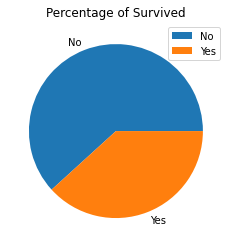

In [45]:
# Check data balance
df['Survived'].value_counts().plot(kind='pie', labels=['No','Yes'])
plt.title('Percentage of Survived')
plt.legend(['No','Yes'])
plt.ylabel(None)
plt.show()

In [46]:
# Handling data imbalance
from imblearn import under_sampling, over_sampling

X = df.drop(['Survived'],axis=1)
y = df['Survived']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

In [47]:
df_undersampling = pd.concat([X_under, y_under], axis=1)
df_undersampling.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Title_Category,Survived
0,3,0,43.000000,1,6,46.9000,0,0,1,0,0
1,3,1,29.699118,0,0,8.6625,0,0,1,0,0
2,1,1,45.500000,0,0,28.5000,0,0,1,0,0
3,3,0,21.000000,2,2,34.3750,0,0,1,0,0
4,1,1,29.699118,0,0,221.7792,0,0,1,0,0


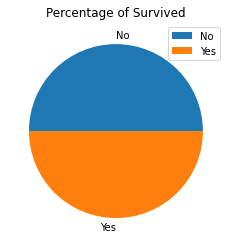

In [48]:
df_undersampling['Survived'].value_counts().plot(kind='pie',labels = ['No','Yes'])
plt.title('Percentage of Survived')
plt.legend(['No','Yes'])
plt.ylabel(None)
plt.show()

In [49]:
# split data test and train

from sklearn.model_selection import train_test_split

X = df_undersampling.drop(['Survived'],axis=1)
y = df_undersampling['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [50]:
# modeling using decisiontree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)
preds = model.predict(X_test)

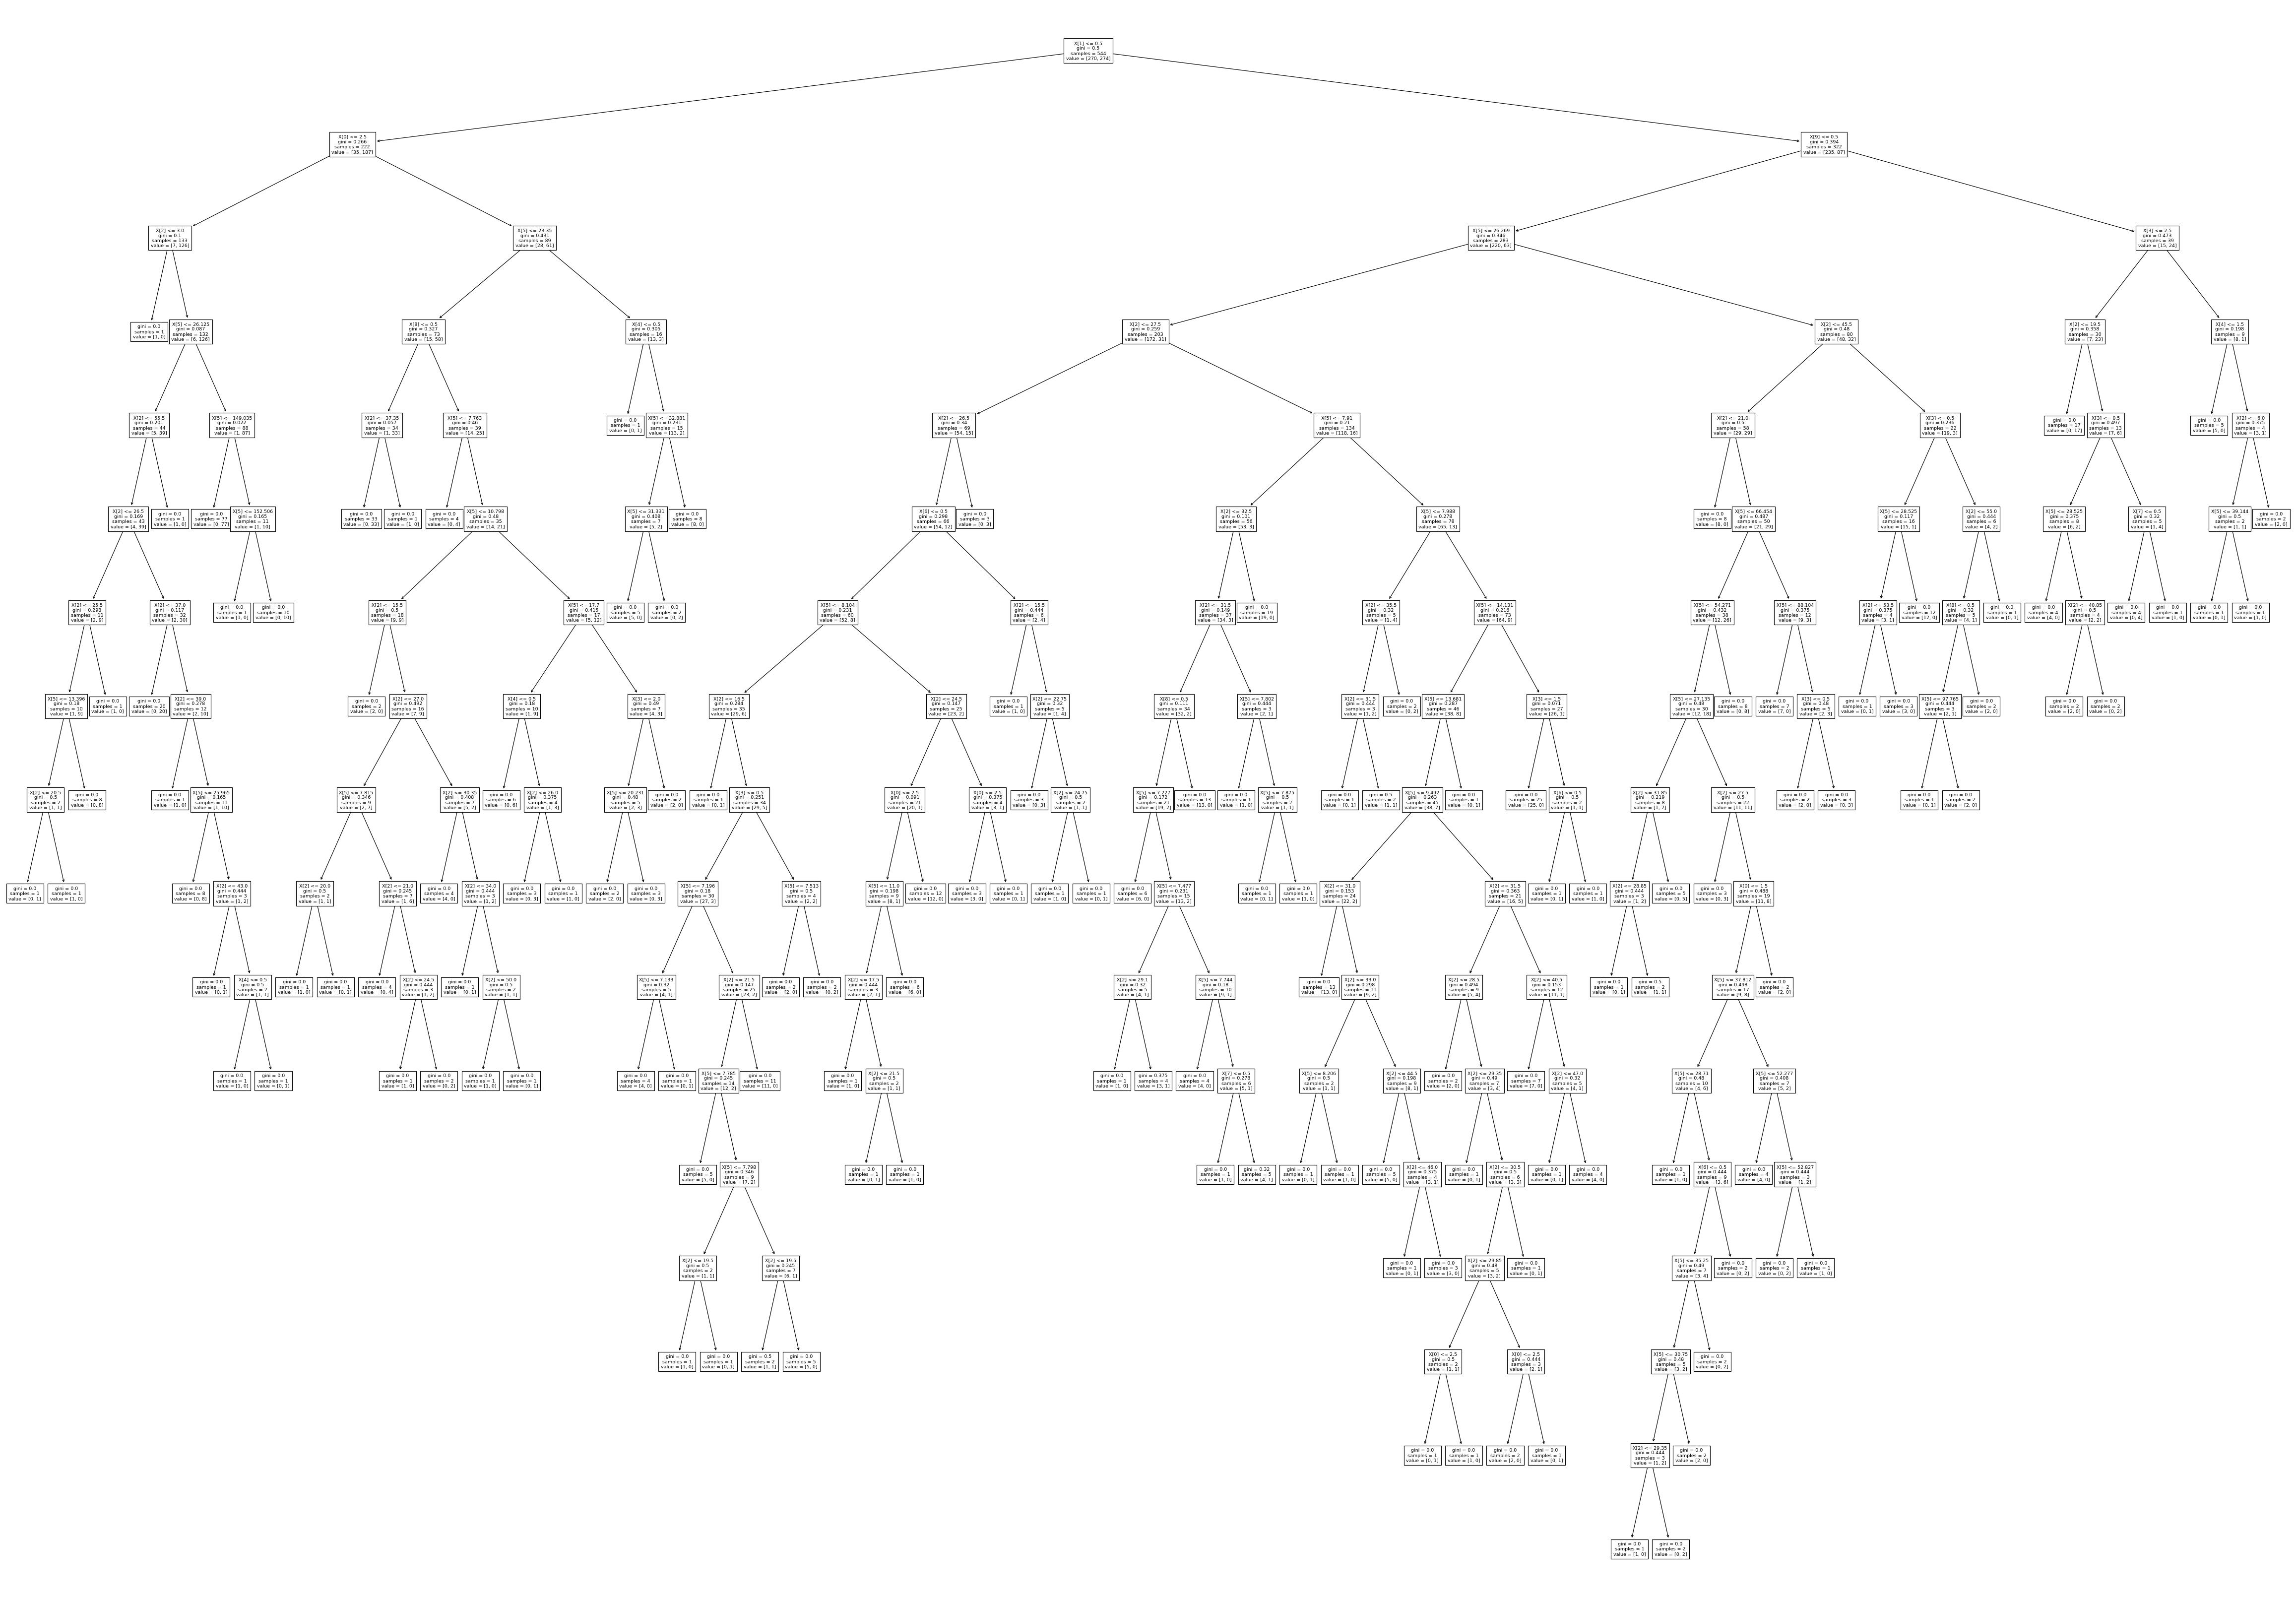

In [51]:
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(70,50))
tree.plot_tree(model,fontsize = 8)
plt.show()

# Model Evaluation

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        70
           1       0.72      0.67      0.69        66

    accuracy                           0.71       136
   macro avg       0.71      0.71      0.71       136
weighted avg       0.71      0.71      0.71       136



Text(37.76388888888889, 0.5, 'Real Value')

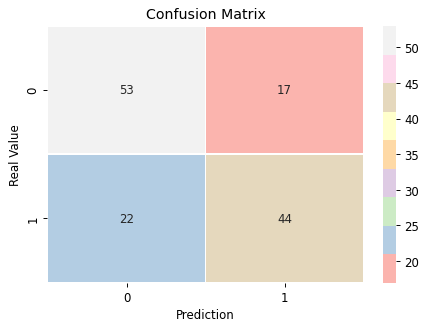

In [52]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, preds)
print(classification_report(y_test, preds))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

In [53]:
from sklearn.metrics import  recall_score, precision_score, f1_score
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.7213114754098361
Recall  0.6666666666666666
F1 Score  0.6929133858267716
